## Mexico's COVID19 Data description and Analisys

> 
> 
<font size=5 color='black'>Data comes from:</font>
<a  href="https://coronavirus.gob.mx/datos/#DownZCSV"><font size=5 color='blue'>Updated Every 24hrs</font></a>
> 
>
<div class="container" style="position: relative;text-align: center,border:2px solid red;
  color: white;">
  <img align="left" src="https://i.imgur.com/9hAvQVf.png">
</div>

<font size=5 color='black'>The name of each file changes every day</font>
>
<font size=5 color='black'> <a href="https://coronavirus.gob.mx/datos/#DownZCSV">https://coronavirus.gob.mx/datos/#DownZCSV</a> </font>
>
<img align="left" src="https://i.imgur.com/ohUy6u0.png">
<br>
<br>
<font size=5 color='black'>'200XXXCOVID19MEXICO.csv' comes from the link:</font>
<br>
<font size=5 color='black'> Todos los datos (DGE)</font>


# Loading data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Pacient data contains detail information about every subject in the database, age, sex, and some illness history
patient_data = pd.read_csv('200515COVID19MEXICO.csv', encoding='ANSI')
# Confirmed is the number of comfirmed cases each day
confirmed = pd.read_csv('Casos_Diarios_Estado_Nacional_Confirmados_20200515.csv', encoding='ANSI')
# Suspicious is the number of suspicious cases each day
suspicious = pd.read_csv('Casos_Diarios_Estado_Nacional_Sospechosos_20200515.csv', encoding='ANSI')
# Negatives is the number of negative test cases each day
negatives = pd.read_csv('Casos_Diarios_Estado_Nacional_Negativos_20200515.csv', encoding='ANSI')
# Deaths is the number of deceased cases each day
deaths = pd.read_csv('Casos_Diarios_Estado_Nacional_Defunciones_20200515.csv', encoding='ANSI')
# State_names is an array with the names of each state
state_names = deaths.nombre.values

# 1.- Frequency of cases

## Confirmed, Deaths, Negative and Suspicious Data

In [ ]:
# Data example, confirmed, negative, deaths and suspicious all dataFrames look the same.
confirmed.head()

### State Names

In [ ]:
state_names

### Functions to get discrete or cummulative data from any particular state

In [9]:
# Import the functions to get data from a particular country state
# data could be discrete (number of cases by day) or cummulative.
from data_helpers import get_discrete, get_cummulative
# Both functions take a name and a database. (name='string',raw_data=pd.DataFrame)
# this is for the confirmed, suspicious, negative and deaths dataframes
# patients data is different.

In [10]:
discrete_mexico_city_deaths = get_discrete('DISTRITO FEDERAL',deaths)
cummulative_mexico_city_deaths = get_cummulative('DISTRITO FEDERAL',deaths)

### get_discrete() gives a pd.Series with the dates for columns

In [11]:
discrete_mexico_city_deaths

,cve_ent,poblacion,nombre,17-03-2020,18-03-2020,19-03-2020,20-03-2020,21-03-2020,22-03-2020,23-03-2020,...,06-05-2020,07-05-2020,08-05-2020,09-05-2020,10-05-2020,11-05-2020,12-05-2020,13-05-2020,14-05-2020,15-05-2020
6,9,9018645,DISTRITO FEDERAL,0,0,0,0,0,1,1,...,34,23,24,32,33,23,24,19,6,0


### get_cummulative() gives an array of the cummulative record 

In [8]:
cummulative_mexico_city_deaths[:10]

[0, 0, 0, 0, 0, 1, 2, 2, 3, 6]


### Function to plot discrete data

In [12]:
# Data should be a list (even if there is only one state_data) with data from get_discrete()
# Names also should be an array of strings with equal len() to the data list
# You can choose the colors of each state by passing an array: ['r','b','y'...]
# Or passing a string like: 'rbgy' if each of the colors are one letter.
# If colors = None, colors will be a cycle from the default: 'b', 'g', 'r', 'c', 'm' and 'y'

def plot_discrete(data, names ='no_name',colors=None, title=None):
    plt.close('all')
    plt.style.use('seaborn-whitegrid')

    plt.rcParams["figure.figsize"] = (15,6)
    
    if colors == None:
            colors ='bgrcmy'* int(np.ceil(len(data)/6))
    
    for ind, i in enumerate(data):
        
        plt.bar(i.columns[3:],i.values[0][3:], label = names[ind],color = colors[ind],alpha = 0.5)
       
    plt.title(title, fontsize=14)
    plt.legend(loc='upper left')
    plt.xticks(rotation=90)
    plt.show()

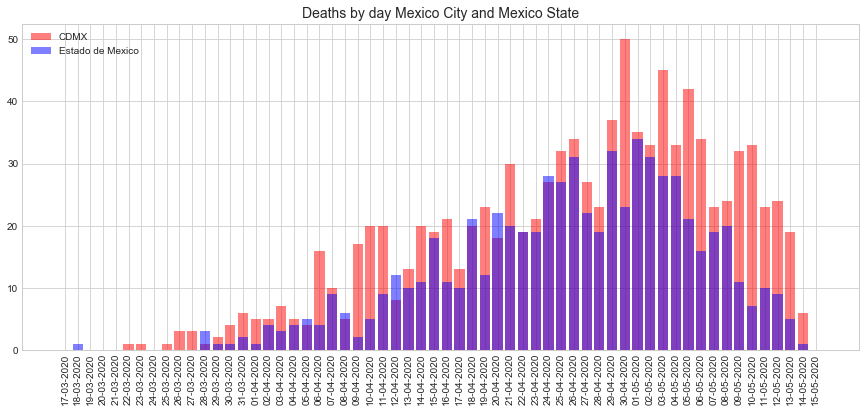

In [13]:
plot_discrete(data = [get_discrete('DISTRITO FEDERAL',deaths),
                      get_discrete('MEXICO',deaths)],
              names =['CDMX','Estado de Mexico'],
              colors=['r','b'],
              title='Deaths by day Mexico City and Mexico State')

### Funtion to plot cummulative data

In [15]:
# Same Instructions of the discrete data apply here
# Obviosly input data should come from get_cummulative()

def plot_cummulative(data, names ='no_name',colors=None, title=None):
    plt.close('all')
    plt.style.use('seaborn-whitegrid')

    plt.rcParams["figure.figsize"] = (15,7)
    
    if len(data[0]) == len(deaths.columns[3:]):
        index = deaths.columns[3:]
    elif len(data[0]) == len(confirmed.columns[3:]):
        index = confirmed.columns[3:]
    elif len(data[0]) == len(suspicious.columns[3:]):
        index = suspicious.columns[3:]
    elif len(data[0]) == len(negatives.columns[3:]):
        index = negatives.columns[3:]
    else:
        index = np.arange(0,len(data[0]))
    
    if colors == None:
        colors ='bgrcmy'* int(np.ceil(len(data)/6))
    
    for ind,i in enumerate(data):
        
        plt.plot(index,i,label=names[ind],color=colors[ind])
        plt.scatter(index[-1],i[-1],color=colors[ind])
        plt.text(index[-1], i[-1],str(int(i[-1])) , fontsize=14 ,color=colors[ind])
        plt.fill_between(index, i, color = colors[ind], alpha = 0.4)
        
    plt.xticks(rotation=90)
    plt.title(title, fontsize=14)
    plt.legend(loc='upper left',fontsize=12)
    plt.show()

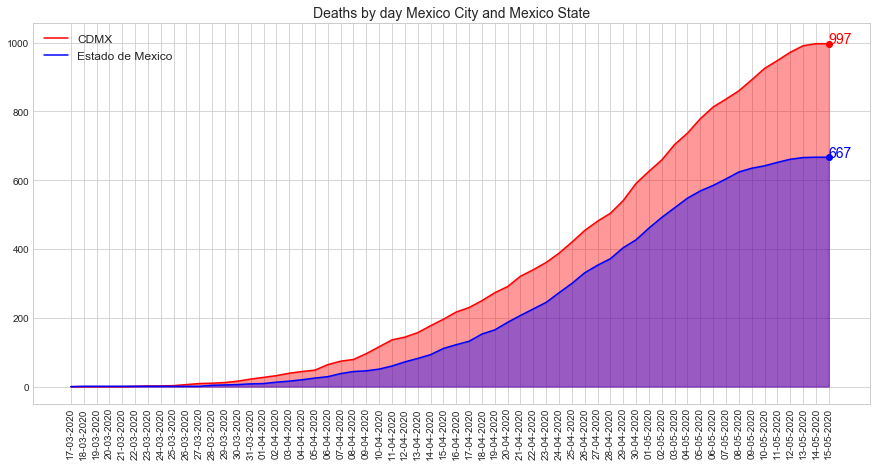

In [16]:
plot_cummulative([get_cummulative('DISTRITO FEDERAL',deaths),
                  get_cummulative('MEXICO',deaths)],
                  names =['CDMX','Estado de Mexico'],
                  colors=['r','b'],
                  title='Deaths by day Mexico City and Mexico State')

## Ploting all data from max to min.

### Function to get several states sorted from max to min.

In [ ]:
from data_helpers import get_max_to_min

# It returns two lists, one with a state_data and one with the names of each state:
# [data1,data2..],['name1','name2'..] = get_max_to_min([raw_data],n=None,discrete=True,include_national=False)
# n is the number of states returned, if None will return all states
# Deafault is set to: discrete
# To switch for cummulative data just set discrete parameter to == False
# National data is naturally much more higher that any particular state, by default is ommited
# To include it set the parameter include_national to == True

def get_max_to_min(raw_data,n=None,discrete=True,include_national=False):
    dic = {}
    
    if include_national:
        names = raw_data.nombre
    else:
        names = [x for x in raw_data.nombre if x != 'Nacional']

    for i in names:
        
        if discrete:
            result = get_discrete(i,raw_data).values[0][3:].sum()
        else:
            result = get_cummulative(i,raw_data)[-1]
        
        if result in dic.keys():
            dic[result+0.1] = i
        else:
            dic[result] = i

    dic_sort = sorted(dic.keys(),reverse=True)
    sorted_names = [dic[x] for x in dic_sort][:n]
    
    if discrete:
        return [get_discrete(x,raw_data) for x in sorted_names], sorted_names
    else:
        return [get_cummulative(x,raw_data) for x in sorted_names], sorted_names

In [ ]:
# Raw_data is the database of origin: deaths, confirmed, etc...
# N is the number of states that will be plotted
# If the Discrete parameter is False then cummulative data will be plotted

def plot_all(raw_data,n=None, discrete=True, title='No title',colors = None):
    
    if discrete:
        data, names = get_max_to_min(raw_data,n=n,discrete=True)
        plot_discrete(data = data,
                      names = names,
                      colors = colors,
                      title = title)
    else:
        data, names = get_max_to_min(raw_data,n=n,discrete=False)
        plot_cummulative(data = data,
                         names = names,
                         colors = colors,
                         title = title)

### Discrete states from max to min incidence

In [ ]:
plot_all(raw_data = deaths,
         n=4,
         colors= ['b','g','black','r'],
         discrete=True,
         title='Mexico States with more Deaths by Day')

### Cummulative states from max to min incidence

In [ ]:
plot_all(raw_data = deaths,
         n=4,
         discrete=False,
         colors= ['b','g','black','r'],
         title='Mexico States with more Deaths by Day')

# 2.- Patients Data

### Cleaning the database

In [ ]:
# Eliminate counties data since it lacks one term an is useless without it
patient_data = patient_data.drop('MUNICIPIO_RES',axis=1)

### Renaming columns to english

In [ ]:
patient_data = patient_data.rename(columns={"FECHA_ACTUALIZACION":"Updated_at",
                                             "ID_REGISTRO": "id",
                                             "ORIGEN":"origin",
                                             "SECTOR":"sector",
                                             "ENTIDAD_UM": "treated_at",
                                             "SEXO": "sex",
                                             "ENTIDAD_NAC":"borne_at",
                                             "ENTIDAD_RES": "lives_at",
                                             "TIPO_PACIENTE": "pacient_type",
                                             "FECHA_INGRESO":"admission_date",
                                             "FECHA_SINTOMAS":"onset_symptoms",
                                             "FECHA_DEF": "day_of_death",
                                             "INTUBADO": "intubated",
                                             "NEUMONIA":"pneumonia",
                                             "EDAD":"age",
                                             "NACIONALIDAD":"is_mexican",
                                             "EMBARAZO":"pregnancy",
                                             "HABLA_LENGUA_INDIG":"speaks_dialect",
                                             "DIABETES":"diabetes",
                                             "EPOC": "copd",
                                             "ASMA":"asthma",
                                             "INMUSUPR":"immunosuppression",
                                             "HIPERTENSION":"hypertension",
                                             "OTRA_COM":"another_illness",
                                             "CARDIOVASCULAR":"cardiovascular",
                                             "OBESIDAD":"obesity",
                                             "RENAL_CRONICA":"kidney_disease",
                                             "TABAQUISMO":"smoker",
                                             "OTRO_CASO":"close_to_infected",
                                             "RESULTADO":"result",
                                             "MIGRANTE":"migrant",
                                             "PAIS_NACIONALIDAD":"nationality",
                                             "PAIS_ORIGEN": "country_of_origin",
                                             "UCI":"icu"})

### Data keys:

In [ ]:
patient_data.keys()

### Data sample

In [ ]:
patient_data.head()

### Loading a function to translate the codes from the data

In [ ]:
from data_helpers import patient_data_keys
# Some data is coded, like the counties from:  patient_data['sector'],
# This function takes the column name and a key to decoded
# if the key == None, then outputs all the codes from the column

In [ ]:
patient_data_keys('borne_at',key=13)

In [ ]:
patient_data_keys('sector',key=None)

### Exploring the database

Column name:  BORNE_AT
Key:  13  :  HIDALGO


In [ ]:
edad = X['EDAD'] 
y = [1 if x == '9999-99-99' else 0 for x in X['FECHA_DEF']]
sexo = [0 if x == 1 else 99 for x in X['SEXO']]
X = X[['DIABETES','EPOC',
             'ASMA', 'INMUSUPR', 'HIPERTENSION',
             'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']]
X['SEXO'] = sexo
X = X.replace(97,2)
X = X.replace(98,2)
X = X.replace(99,2)
X = X.replace(1,100)
X = X.replace(2,-100)
X['EDAD'] = edad
